In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

data = pd.read_csv('netflix_titles.csv')

In [54]:
def type_21d(type):
    if type >= 2000:
        return int(type)

def type_20d(type):
    if type < 2000:
        return int(type)


data['rel_21'] = data['release_year'].apply(type_21d)
data['rel_20'] = data['release_year'].apply(type_20d)
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rel_21,rel_20,type_m,type_tv,list_5
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,NaN,Movie,None,None
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,NaN,Movie,None,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2013.0,NaN,None,TV Show,None
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2016.0,NaN,None,TV Show,None
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,NaN,Movie,None,None


In [4]:
def type_md(type):
    if type == "Movie":
        return type

def type_tvd(type):
    if type == "TV Show":
        return type
    
        
data['type_m'] = data['type'].apply(type_md)
data['type_tv'] = data['type'].apply(type_tvd)
data["type_m"].dropna()

0       Movie
1       Movie
4       Movie
6       Movie
7       Movie
        ...  
5577    Movie
5578    Movie
5579    Movie
5580    Movie
6231    Movie
Name: type_m, Length: 4265, dtype: object

In [72]:
def list_d(type):
    if type == "Documentaries":
        return type
    elif type == "Stand-Up Comedy":
        return type
    elif type == "Dramas, International Movies":
        return type
    elif type == "Docuseries":
        return type
    elif type == "Comedies, Dramas, International Movies":
        return type
    else:
        return "Other"
data['list_5'] = data['listed_in'].apply(list_d)

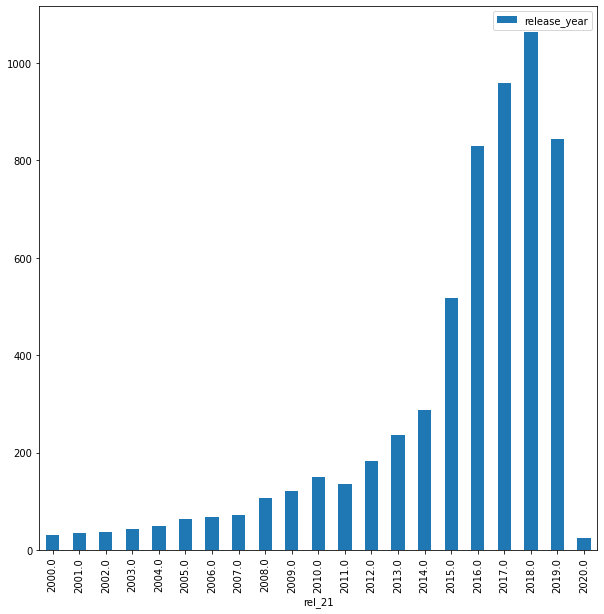

In [5]:
data_tab_1 = data.groupby("rel_21")[["release_year"]].count().plot(kind="bar",figsize=(10,10))

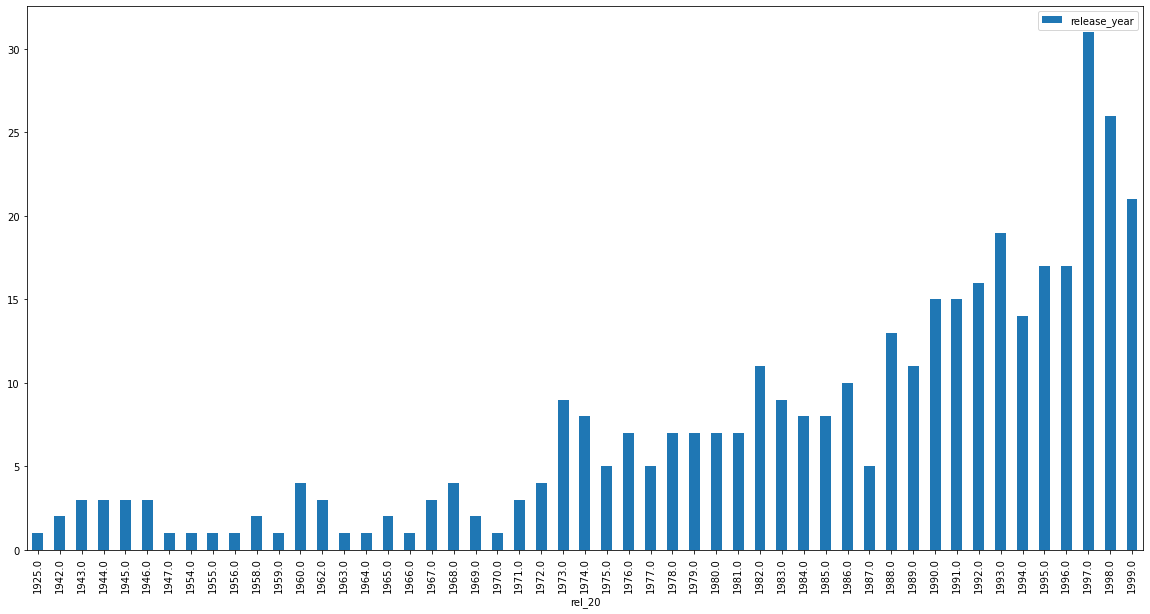

In [6]:
data_tab_2 = data.groupby("rel_20")[["release_year"]].count().plot(kind="bar",figsize=(20,10))

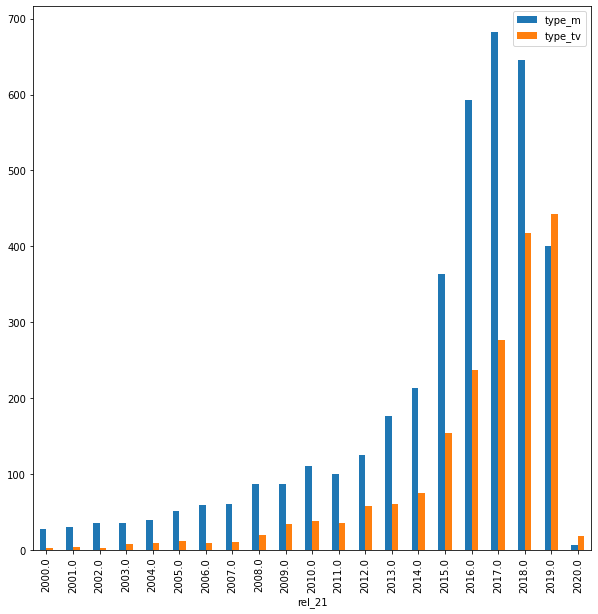

In [7]:
data_tab_3 = data.groupby("rel_21")[["type_m","type_tv"]].count().plot(kind="bar",figsize=(10,10))

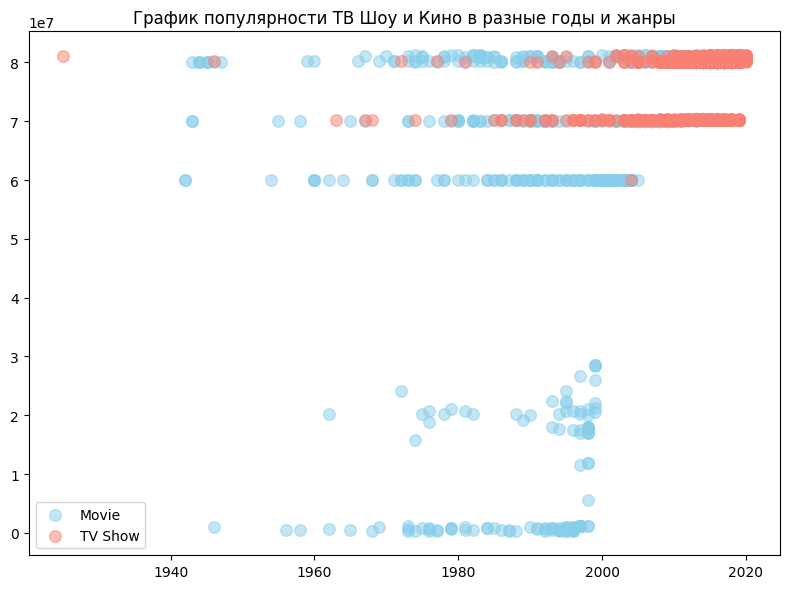

In [93]:
figs,ax = plt.subplots(1, 1, figsize=(8,6), dpi=100)
ax.scatter(x="release_year",y="show_id",data=data[data["type"]=="Movie"],color="skyblue",alpha = 0.5, label="Movie",s=70)
ax.scatter(x="release_year",y="show_id",data=data[data["type"]=="TV Show"],color="salmon",alpha = 0.5, label="TV Show",s=70)
ax.set_title("График популярности ТВ Шоу и Кино в разныe годы и жанры")
ax.legend()
plt.subplots_adjust(left=0.5,right=0.8)
plt.tight_layout()

plt.show()

In [384]:
data["type"]=="Movie"

0        True
1        True
2       False
3       False
4        True
        ...  
6229    False
6230    False
6231     True
6232    False
6233    False
Name: type, Length: 6234, dtype: bool